# Section 01 - Warm-up

In [1]:
import numpy as np
import pandas as pd
import random

## Exercise 1

1. Using numpy, generate 1000 values from the normal random distribution ($\mu=0$, $\sigma=1$).
1. Plot the time series.
1. Plot the histogram.

In [2]:
np.random.seed(42)
rand_series = np.random.normal(loc=0, scale=1, size=(1000))
rand_series = pd.DataFrame(rand_series, columns=["random_data"])
rand_series.head()

,random_data
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153


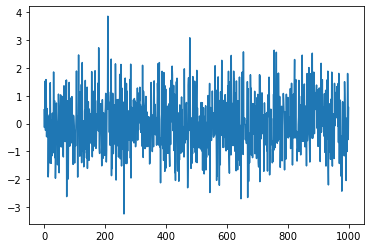

In [3]:
rand_series['random_data'].plot();

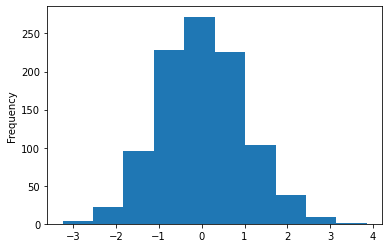

In [4]:
rand_series['random_data'].plot(kind='hist');

## Exercise 2

1. Add a trend line to the noise.
1. Make a scatterplot.

In [5]:
rand_series['x'] = np.linspace(0, 10, 1000)
rand_series['y'] = rand_series['x'] + rand_series['random_data']
rand_series.head()

,random_data,x,y
0,0.496714,0.00000,0.496714
1,-0.138264,0.01001,-0.128254
2,0.647689,0.02002,0.667709
3,1.523030,0.03003,1.553060
4,-0.234153,0.04004,-0.194113


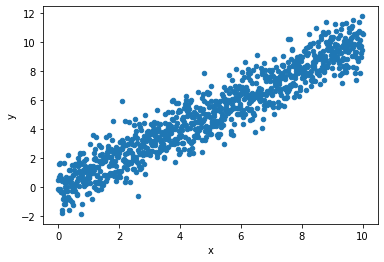

In [6]:
rand_series.plot('x', 'y', kind='scatter');

## Exercise 3

1. Call the np.cumsum() on your noise.
1. Plot the result
1. What does it remind you of?

In [7]:
rand_series['cum_sum'] = np.cumsum(rand_series['random_data'])
rand_series.head()

,random_data,x,y,cum_sum
0,0.496714,0.00000,0.496714,0.496714
1,-0.138264,0.01001,-0.128254,0.358450
2,0.647689,0.02002,0.667709,1.006138
3,1.523030,0.03003,1.553060,2.529168
4,-0.234153,0.04004,-0.194113,2.295015


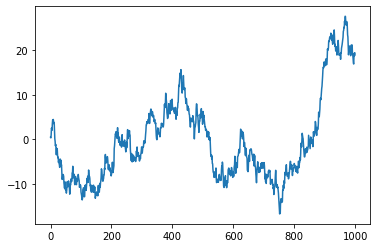

In [8]:
rand_series['cum_sum'].plot();

## Exercise 4

1. Generate and plot 1000 samples from the multivariate normal and plot.

In [9]:
np.random.seed(42)
rand_matrix = np.random.multivariate_normal([0,0], [[1, -0.5],[-0.5, 2]], size=1000)
rand_matrix = pd.DataFrame(rand_matrix, columns=['x', 'y'])
rand_matrix.head()

,x,y
0,-0.396141,0.634648
1,0.884714,1.407968
2,-0.059494,-0.401171
3,-0.266484,2.429053
4,0.713254,-0.459493


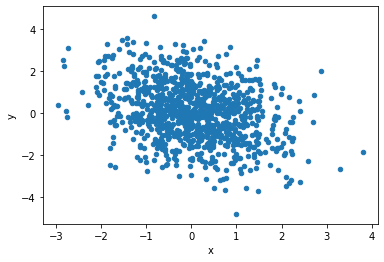

In [10]:
rand_matrix.plot('x', 'y', kind='scatter');

## Exercise 05

1. Calculate sample mean and sample covariance.

Lembrando que covariância é:

$$ cov(X, X) = var(X) $$

e, que

$$ cov(X, Y) = \frac{1}{n}\sum_{i=0}^n{(x_{i}-\bar{x})(y_{i}-\bar{y})} $$

In [11]:
x_mean = rand_matrix['x'].mean()
y_mean = rand_matrix['y'].mean()

print(f"""Média de x: {round(x_mean, 2)}
Média de y: {round(y_mean, 2)}""")

Média de x: 0.03
Média de y: 0.06


In [12]:
Sxy = 0

for i in range(len(rand_matrix)):
    Sxy += (rand_matrix['x'][i]-x_mean)*(rand_matrix['y'][i]-y_mean)

Sxy = Sxy/(len(rand_matrix)-1)

print(f"""cov(x, y) = {round(Sxy, 10)}""")

cov(x, y) = -0.4304173006


In [13]:
x_var = rand_matrix['x'].std()**2
y_var = rand_matrix['y'].std()**2

print(f"""Variância de x: {round(x_var,2)}
Variância de y: {round(y_var, 2)}""")

Variância de x: 0.99
Variância de y: 1.86


# Bonus: Brazilian stocks

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as fig

url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br'
df_br_stocks = pd.read_html(url, encoding='utf-8', decimal=',', thousands='.')[0][:-1]

df_br_stocks['Symbol_reduced'] = df_br_stocks['Código']+str('.SA')

# df_br_stocks = df_br_stocks.loc[~df_br_stocks['Symbol'].str[0].str.isnumeric(), :]

# br_stock_symbols = df_br_stocks['Symbol'].unique().tolist()

# df_br_stocks = df_br_stocks[['Symbol', 'Symbol_reduced', 'Company Name', 'Last Price', 'Change', '% Change', 'Volume']]

df_br_stocks

symbols = df_br_stocks['Symbol_reduced'].unique().tolist()

df_br_stocks.head(10)

,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Symbol_reduced
0,ABEV3,AMBEV S/A,ON,4355174839,2.927,ABEV3.SA
1,AZUL4,AZUL,PN N2,327283207,0.638,AZUL4.SA
2,B3SA3,B3,ON NM,1930877944,5.253,B3SA3.SA
3,BBAS3,BRASIL,ON NM,1283197221,1.968,BBAS3.SA
4,BBDC3,BRADESCO,ON N1,1147260246,1.168,BBDC3.SA
5,BBDC4,BRADESCO,PN N1,4261649634,4.881,BBDC4.SA
6,BBSE3,BBSEGURIDADE,ON EDR NM,671584841,0.855,BBSE3.SA
7,BEEF3,MINERVA,ON NM,239331676,0.104,BEEF3.SA
8,BPAC11,BTGP BANCO,UNT N2,263871572,1.307,BPAC11.SA
9,BRAP4,BRADESPAR,PN N1,222075664,0.632,BRAP4.SA


In [ ]:
br_stock_symbols = 

In [4]:
with open('../data/interim/lst_br_stock_symbols.txt', 'w') as writer:
    # writer.write(str(br_stock_symbols)[1:-2])
    # writer.writelines(br_stock_symbols)
    for stock in symbols:
        if stock != symbols[-1]:
            writer.write(str(stock)+'\n')
        else:
            writer.write(str(stock))

with open('../data/interim/lst_br_stock_symbols.txt', 'r') as reader:
    # Note: readlines doesn't trim the line endings
    lst = reader.read().splitlines()

In [7]:
with open('../data/interim/lst_stock_symbols.txt', 'r') as reader:
    # Note: readlines doesn't trim the line endings
    lst = reader.read().splitlines()

In [110]:
symbols_list = ['SULA11.SA',  'ENGI11.SA', 'BRDT3.SA', 'LREN3.SA', 'TAEE11.SA', 'MRVE3.SA', 'PETR4.SA', 'PCAR3.SA', 'BBDC4.SA', 'BPAC11.SA']
qty = 15 - len(symbols_list)
market = "br"

symbols = pd.read_csv('../data/interim/lst_stock_symbols.txt', sep=';')
symbols = symbols.loc[symbols['country']==market]
symbols = symbols.loc[(~symbols['symbol'].isin(symbols_list)), 'symbol'].sample(qty, random_state=42).tolist()
symbols.extend(symbols_list)
symbols

['CYRE3.SA',
 'ABEV3.SA',
 'MGLU3.SA',
 'BBDC3.SA',
 'QUAL3.SA',
 'SULA11.SA',
 'ENGI11.SA',
 'BRDT3.SA',
 'LREN3.SA',
 'TAEE11.SA',
 'MRVE3.SA',
 'PETR4.SA',
 'PCAR3.SA',
 'BBDC4.SA',
 'BPAC11.SA']

In [19]:
import yfinance as yf
import os
import pandas as pd

ok = nok = 0

for symbol in symbols:
  if not os.path.exists(f"../data/raw/br/{symbol.split('.')[0]}.csv"):
    data = yf.download(symbol, start="2016-01-01", end="2021-02-12")
    if data.size > 0:
      data.to_csv(f"""../data/raw/br/{symbol.split('.')[0]}.csv""")
      ok += 1
    else:
      print("Not saving...")
      nok += 1
    #   lst_delist.append(symbol)

print(f"""ok: {ok}
nok: {nok}""")

for symbol in symbols:
  try:
    s = open(f"../data/raw/br/{symbol.split('.')[0]}.csv").readlines()
    if len(s) < 10:
      os.system(f"rm ../data/raw/br/{symbol.split('.')[0]}.csv")
  except:
    print(f"{symbol.split('.')[0]}.csv does not exist.")
    continue

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [128]:
import datetime

input_date = '2021-02-01'

try:
    year = int(input_date[:4])
    month = int(input_date[5:7])
    day = int(input_date[-2:])
    converted_date = str(datetime.date(year,month,day))
    correct_date = True

except ValueError:
    correct_date = False

converted_date, correct_date)

2021-02-01 True


In [133]:
df = pd.read_parquet('../data/interim/data_acquired_2021_02_16.pqt')
df.head()

,Date,Name,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,EMBR3,19.950001,20.299999,19.950001,20.200001,20.200001,3271300.0
1,2020-01-03,EMBR3,20.100000,20.469999,19.990000,20.410000,20.410000,3453700.0
2,2020-01-06,EMBR3,20.430000,20.590000,20.139999,20.379999,20.379999,3352400.0
3,2020-01-07,EMBR3,20.420000,20.570000,20.070000,20.500000,20.500000,3576300.0
4,2020-01-08,EMBR3,20.500000,20.590000,20.290001,20.330000,20.330000,1834500.0
